# Importing Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import nltk
import re
from wordcloud import WordCloud
from collections import Counter

import nltk
from nltk.tokenize import TreebankWordTokenizer, TweetTokenizer
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords = list(set(stopwords.words('english')))
from gensim.models.phrases import Phrases, Phraser
from string import punctuation
punctuation = list(punctuation)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Conv1D, MaxPool1D
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

In [3]:
pip install flwr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 364.7/364.7 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 29.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 74.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 7.8 MB/s eta 0:00:00
  Attempting uninstall: typer
    Found existing installation: typer 0.12.3
    Uninstalling typer-0.12.3:
      Successfully uninstalled typer-0.12.3
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-metadata 1.15.0 requires protobuf<4.21,>=3.20.3; python_version < "3.11", but you have protobuf 4.25.3 which is incompatible.


In [3]:
from flwr.common import (
    EvaluateIns,
    EvaluateRes,
    FitIns,
    FitRes,
    MetricsAggregationFn,
    NDArrays,
    Parameters,
    Scalar,
    ndarrays_to_parameters,
    parameters_to_ndarrays,
)
from flwr.server.client_manager import ClientManager
from flwr.server.client_proxy import ClientProxy
from flwr.server.strategy.aggregate import aggregate, weighted_loss_avg
from collections import OrderedDict
from typing import Dict, List, Optional, Tuple

In [5]:
### install components of flower to realize the one machine simulation
!pip install -U flwr["simulation"]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.1/65.1 MB 10.8 MB/s eta 0:00:00


In [4]:
from sklearn.metrics import roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, f1_score, recall_score

# Download the Dataset

In [5]:
!wget https://onlineacademiccommunity.uvic.ca/isot/wp-content/uploads/sites/7295/2023/03/News-_dataset.zip

--2024-06-19 09:12:31--  https://onlineacademiccommunity.uvic.ca/isot/wp-content/uploads/sites/7295/2023/03/News-_dataset.zip
Resolving onlineacademiccommunity.uvic.ca (onlineacademiccommunity.uvic.ca)... 142.104.197.46
Connecting to onlineacademiccommunity.uvic.ca (onlineacademiccommunity.uvic.ca)|142.104.197.46|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 43106824 (41M) [application/zip]
Saving to: ‘News-_dataset.zip’

News-_dataset.zip   100%[===================>]  41.11M   802KB/s    in 56s     

2024-06-19 09:13:29 (755 KB/s) - ‘News-_dataset.zip’ saved [43106824/43106824]



In [7]:
!unzip News-_dataset.zip

Archive:  News-_dataset.zip
  inflating: Fake.csv                
  inflating: True.csv                


In [8]:
fake_data=pd.read_csv("Fake.csv")
true_data=pd.read_csv("True.csv")

In [ ]:
fake_data.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [ ]:
true_data.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


# **Exploratory Data Analysis (EDA)**

# Exploring Fake News dataset

In [ ]:
fake_data.head(5)

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [ ]:
fake_data.shape

(23481, 4)

In [ ]:
fake_data.columns

Index(['title', 'text', 'subject', 'date'], dtype='object')

In [ ]:
fake_data["subject"].unique()

array(['News', 'politics', 'Government News', 'left-news', 'US_News',
       'Middle-east'], dtype=object)

In [ ]:
fake_data.isna().sum()

title      0
text       0
subject    0
date       0
dtype: int64

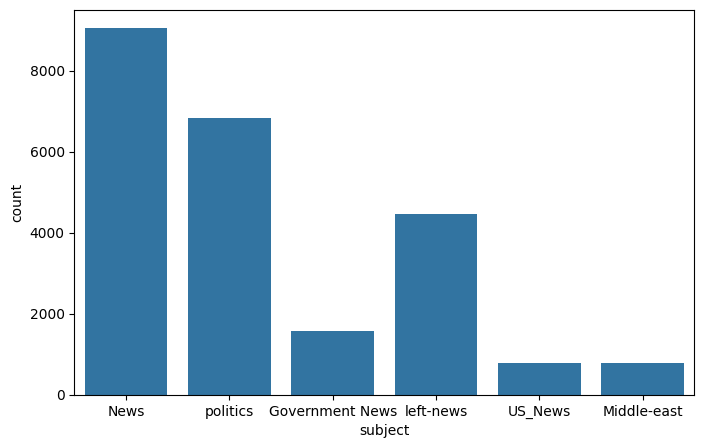

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x="subject", data=fake_data)
plt.show()

In [ ]:
def most_common_words(corpus, nb_words):
    articles = corpus.str.split()
    words = np.array([word for article in articles for word in article if word.lower() not in stopwords])
    counter = Counter(words)
    d = pd.DataFrame(counter, index=['occurrences']).transpose().reset_index()
    d.columns=['word', 'occurences']
    d = d.sort_values('occurences', ascending=False)
    return d[:nb_words]

In [ ]:
#most_common_words(fake_data['text'],10)

# **Duplicates values**

In [9]:
fake_data = fake_data.drop_duplicates(subset=['text'], ignore_index=True)

In [10]:
duplicates = fake_data['text'].value_counts()[fake_data['text'].value_counts()>1]
duplicates

Series([], Name: count, dtype: int64)

In [ ]:
fake_data.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [11]:
fake_data['article'] = fake_data['title'] + '.' + fake_data['text']
del fake_data['title']
del fake_data['text']
fake_data["Label"]=1

In [ ]:
fake_data.head()

,subject,date,article,Label
0,News,"December 31, 2017",Donald Trump Sends Out Embarrassing New Year’...,1
1,News,"December 31, 2017",Drunk Bragging Trump Staffer Started Russian ...,1
2,News,"December 30, 2017",Sheriff David Clarke Becomes An Internet Joke...,1
3,News,"December 29, 2017",Trump Is So Obsessed He Even Has Obama’s Name...,1
4,News,"December 25, 2017",Pope Francis Just Called Out Donald Trump Dur...,1


# Exploring Real news

In [ ]:
true_data.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


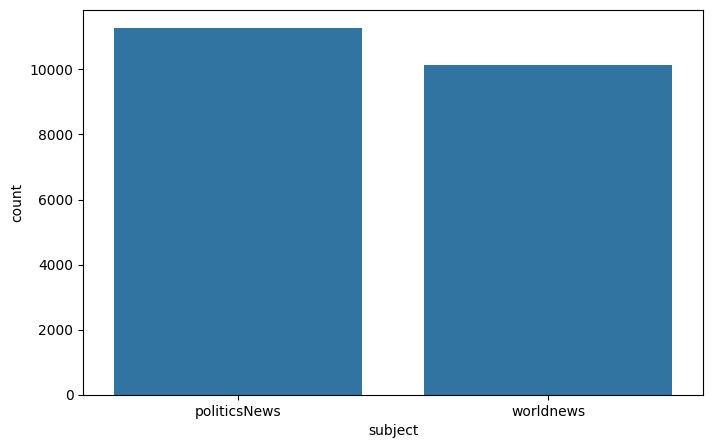

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x="subject", data=true_data)
plt.show()

In [ ]:
true_data.shape

(21417, 4)

In [ ]:
true_data.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [12]:
duplicates = true_data['text'].value_counts()[true_data['text'].value_counts()>1]

In [13]:
true_data = true_data.drop_duplicates(subset=['text'], ignore_index=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
true_data.shape

(21192, 4)

In [ ]:
true_data.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [14]:
true_data['article'] = true_data['title'] + '.' + true_data['text']
del true_data['title']
del true_data['text']
true_data["Label"]=0

In [15]:
true_data.head()

,subject,date,article,Label
0,politicsNews,"December 31, 2017","As U.S. budget fight looms, Republicans flip t...",0
1,politicsNews,"December 29, 2017",U.S. military to accept transgender recruits o...,0
2,politicsNews,"December 31, 2017",Senior U.S. Republican senator: 'Let Mr. Muell...,0
3,politicsNews,"December 30, 2017",FBI Russia probe helped by Australian diplomat...,0
4,politicsNews,"December 29, 2017",Trump wants Postal Service to charge 'much mor...,0


In [16]:
data = pd.concat([true_data, fake_data])
data.reset_index(drop=True, inplace=True)
print(data.shape)
data.head()

(38647, 4)


,subject,date,article,Label
0,politicsNews,"December 31, 2017","As U.S. budget fight looms, Republicans flip t...",0
1,politicsNews,"December 29, 2017",U.S. military to accept transgender recruits o...,0
2,politicsNews,"December 31, 2017",Senior U.S. Republican senator: 'Let Mr. Muell...,0
3,politicsNews,"December 30, 2017",FBI Russia probe helped by Australian diplomat...,0
4,politicsNews,"December 29, 2017",Trump wants Postal Service to charge 'much mor...,0


In [17]:
del data["subject"]
del data["date"]

In [ ]:
data.head()

,article,Label
0,"As U.S. budget fight looms, Republicans flip t...",0
1,U.S. military to accept transgender recruits o...,0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,0
3,FBI Russia probe helped by Australian diplomat...,0
4,Trump wants Postal Service to charge 'much mor...,0


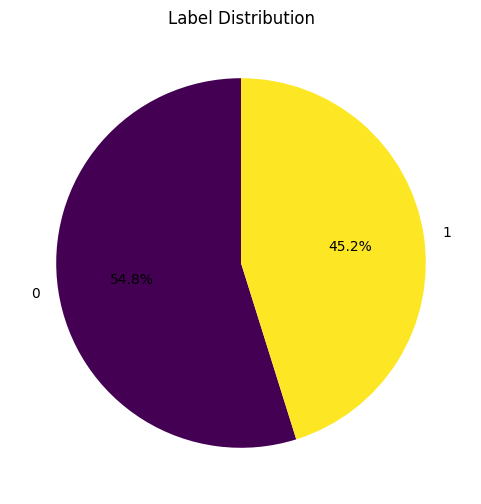

In [ ]:
# Plotting the pie chart
plt.figure(figsize=(6, 6))
data["Label"].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, cmap='viridis')

# Adding title and showing the plot
plt.title('Label Distribution')
plt.ylabel('')  # Hide the y-label
plt.show()

Text(0.5, 1.0, 'False texts')

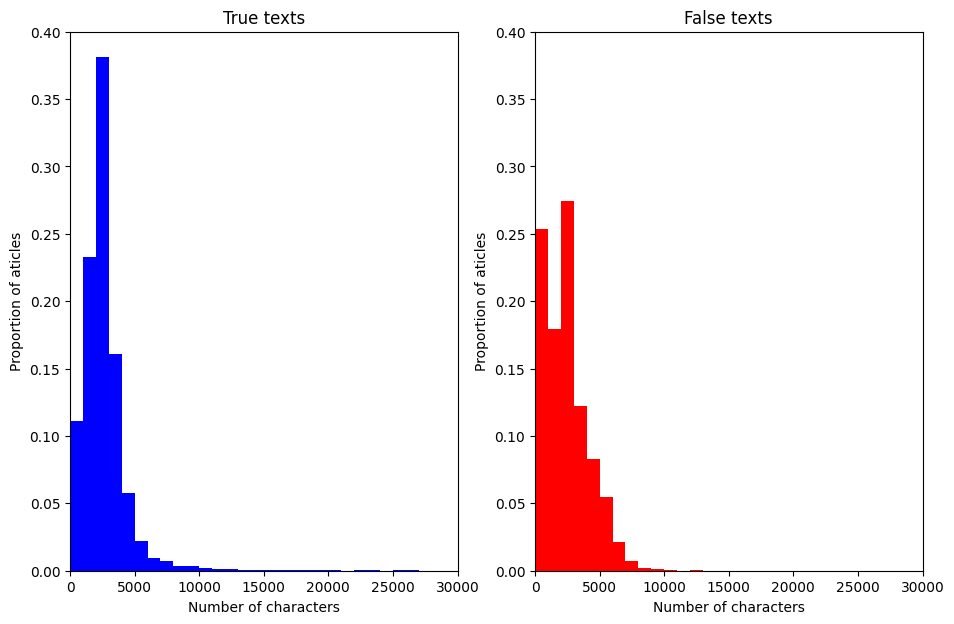

In [ ]:
# Characters length of articles
len_cha_true = data[data['Label'] == 1]['article'].apply(lambda x: len(x))
len_cha_false = data[data['Label'] == 0]['article'].apply(lambda x: len(x))

bins_ = [i * 1000 for i in range(0,31)]

fig, (hist1, hist2) = plt.subplots(1,2, figsize = (11,7))
hist1.hist(len_cha_true, bins = bins_, weights = np.ones(len(len_cha_true))/len(len_cha_true), color = 'b')
hist1.set_ylim(0, top=0.4)
hist1.set_xlim(0, 30000)
hist1.set_xlabel('Number of characters')
hist1.set_ylabel('Proportion of aticles')
hist1.set_title('True texts')

hist2.hist(len_cha_false, bins = bins_, weights = np.ones(len(len_cha_false))/len(len_cha_false), color = 'r')
hist2.set_ylim(0, top=0.4)
hist2.set_xlim(0, 30000)
hist2.set_xlabel('Number of characters')
hist2.set_ylabel('Proportion of aticles')
hist2.set_title('False texts')

# **data preprocessing**

In [18]:
import re
from tqdm import tqdm
tqdm.pandas()

# Assuming stopwords and punctuation are predefined lists
stop = stopwords + punctuation + ['“', '’', '”', '‘', '...']

def preprocessing(article):
    article = article.lower()
    article = re.sub(r'\(\)', '', article, flags=re.DOTALL)  # Corrected pattern for empty parentheses
    article = re.sub(r'https?:\/\/\S+', '', article)  # Corrected the regex pattern for URLs
    article = re.sub(r'#', ' ', article)
    article = re.sub(r'@', ' ', article)
    article = re.sub(r"['“’”‘]", '', article)  # Removed specific punctuation marks
    final_article = []
    for i in article.split():
        if i not in stop:
            final_article.append(i.strip())
    return " ".join(final_article)


In [19]:
data['article'] = data['article'].apply(lambda x : preprocessing(x))

In [20]:
from wordcloud import WordCloud,STOPWORDS
def wordcloud(corpus, title):
    wordcloud = WordCloud(width = 1000, height = 500, stopwords=STOPWORDS, background_color='white').generate(" ".join(corpus))
    plt.figure(figsize=(15,8))
    plt.imshow(wordcloud)
    plt.title(title)
    plt.axis("off")
    plt.show()

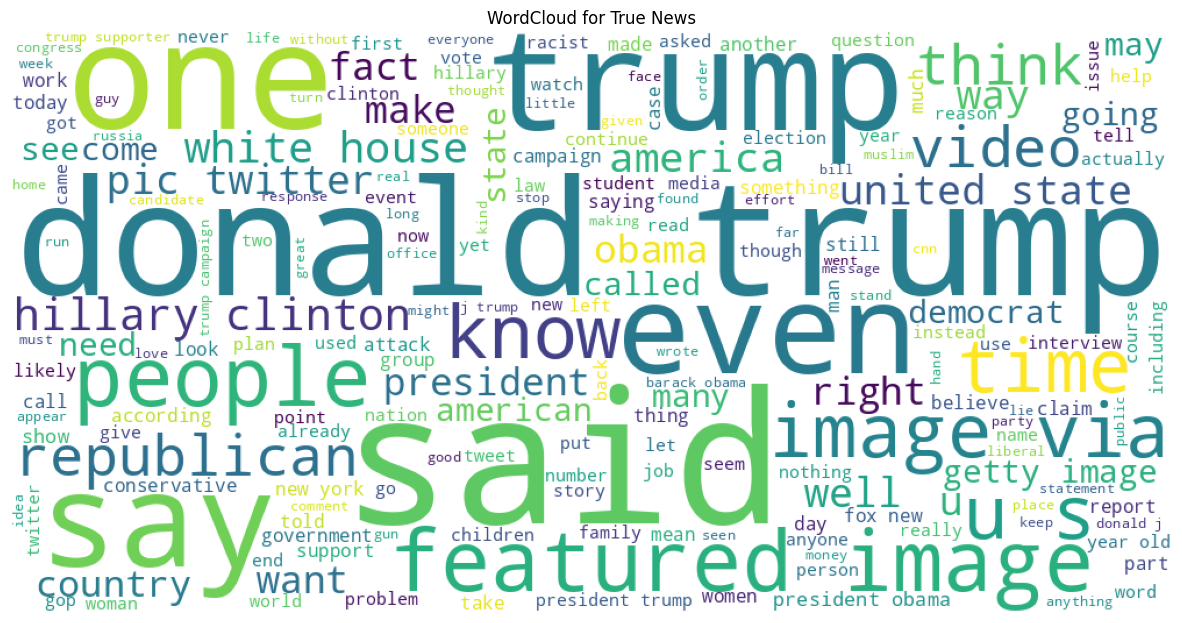

In [ ]:
wordcloud(data[data['Label']==1]['article'], "WordCloud for True News")

In [ ]:
data.head()

,article,Label
0,"u.s. budget fight looms, republicans flip fisc...",0
1,u.s. military accept transgender recruits mond...,0
2,senior u.s. republican senator: let mr. muelle...,0
3,fbi russia probe helped australian diplomat ti...,0
4,trump wants postal service charge much amazon ...,0


In [ ]:
data["length"]=data["article"].apply(len)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Text(0.5, 0, 'Message Length')

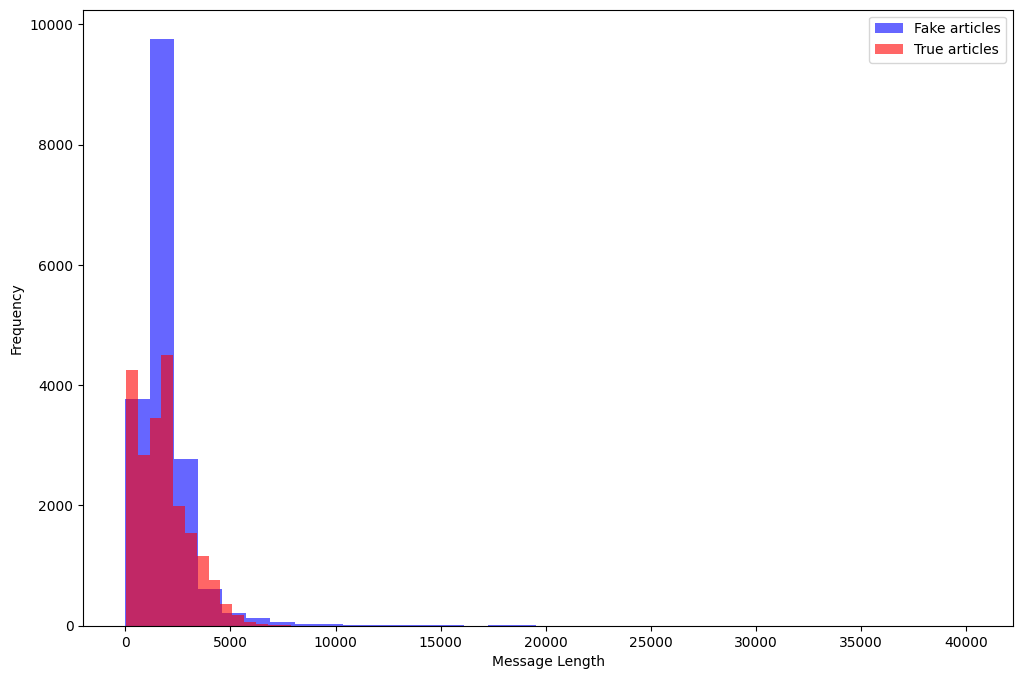

In [ ]:
#display a representation of messages per each category
plt.figure(figsize=(12, 8))

data[data.Label == 1].length.plot(bins=35, kind='hist', color='blue',
                                        label='Fake articles', alpha=0.6)
data[data.Label == 0].length.plot(bins=35,kind='hist', color='red',
                                        label='True articles', alpha=0.6)
plt.legend()
plt.xlabel("Message Length")

In [ ]:
del data["length"]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [21]:
pip install nltk

In [22]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [23]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [24]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

def text_preprocess(text):
    # Tokenization
    tokens = word_tokenize(text)
    # Convert to lowercase and remove special characters/punctuation
    tokens = [word.lower() for word in tokens if word.isalpha()]
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    # Stemming
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(word) for word in tokens]
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(tokens)

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from keras.layers import Embedding, LSTM, Dense, Dropout


In [26]:
## apply the preprocessing steps defined in function text_preprocess
data["article"] = data["article"].apply(lambda x: text_preprocess(x))

In [27]:
# Tokenization
max_words = 10000  # Max number of words to consider in the tokenizer
max_len = 100     # Max length of each sequence
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(data['article'])
sequences = tokenizer.texts_to_sequences(data['article'])
word_index = tokenizer.word_index

# Padding sequences
data_padded = pad_sequences(sequences, maxlen=max_len)

# Preparing labels
labels = data['Label'].values

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data_padded, labels, test_size=0.2, random_state=42)

# Building the LSTM model
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=128, input_length=max_len))
model.add(LSTM(128, return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(64))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Training the model
model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

Epoch 1/5
773/773 [==============================] - 44s 50ms/step - loss: 0.1467 - accuracy: 0.9439 - val_loss: 0.0832 - val_accuracy: 0.9732
Epoch 2/5
773/773 [==============================] - 14s 18ms/step - loss: 0.0491 - accuracy: 0.9846 - val_loss: 0.0806 - val_accuracy: 0.9738
Epoch 3/5
773/773 [==============================] - 13s 17ms/step - loss: 0.0242 - accuracy: 0.9923 - val_loss: 0.0872 - val_accuracy: 0.9738
Epoch 4/5
773/773 [==============================] - 19s 24ms/step - loss: 0.0186 - accuracy: 0.9947 - val_loss: 0.0975 - val_accuracy: 0.9761
Epoch 5/5
773/773 [==============================] - 15s 20ms/step - loss: 0.0093 - accuracy: 0.9975 - val_loss: 0.1158 - val_accuracy: 0.9719


In [35]:
from tensorflow import keras
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Embedding

# Define model parameters
embedding_dim = 150  # Embedding size from the image
vocab_size = 3152  # Vocabulary size from the image
dropout_rate = 0.3  # Dropout rate from the image

# Model definition
model = keras.Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=None))  # Input length can vary
model.add(Conv1D(filters=32, kernel_size=3, activation="relu"))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(dropout_rate))
model.add(LSTM(32))
model.add(Dropout(dropout_rate))
model.add(Dense(256, activation="relu"))  # Dense layer 1 from the image
model.add(Dense(1, activation="sigmoid"))  # Output layer from the image

# Compile the model
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(X_train, y_train, epochs=5, batch_size=32)

Epoch 1/5
967/967 [==============================] - 59s 53ms/step - loss: 0.1303 - accuracy: 0.9509
Epoch 2/5
967/967 [==============================] - 14s 14ms/step - loss: 0.0575 - accuracy: 0.9814
Epoch 3/5
967/967 [==============================] - 12s 12ms/step - loss: 0.0330 - accuracy: 0.9895
Epoch 4/5
967/967 [==============================] - 11s 11ms/step - loss: 0.0221 - accuracy: 0.9925
Epoch 5/5
967/967 [==============================] - 10s 10ms/step - loss: 0.0190 - accuracy: 0.9941


In [36]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Loss: {loss}")
print(f"Accuracy: {accuracy}")

# Make predictions
predictions = model.predict(X_test)

# Check data types (optional)
print(f"y_test data type: {y_test.dtype}")
print(f"predictions data type: {predictions.dtype}")

# Calculate F1 score
from sklearn.metrics import f1_score
f1 = f1_score(y_test, predictions.round())
print(f"F1 score: {f1}")

# Calculate recall
from sklearn.metrics import recall_score
recall = recall_score(y_test, predictions.round())
print(f"Recall: {recall}")

# Calculate confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions.round())
print(f"Confusion matrix:\n{cm}")




242/242 [==============================] - 1s 4ms/step - loss: 0.1016 - accuracy: 0.9717
Loss: 0.10161031782627106
Accuracy: 0.9716688394546509
242/242 [==============================] - 1s 3ms/step
y_test data type: int64
predictions data type: float32
F1 score: 0.9680525164113785
Recall: 0.9518072289156626
Confusion matrix:
[[4193   51]
 [ 168 3318]]


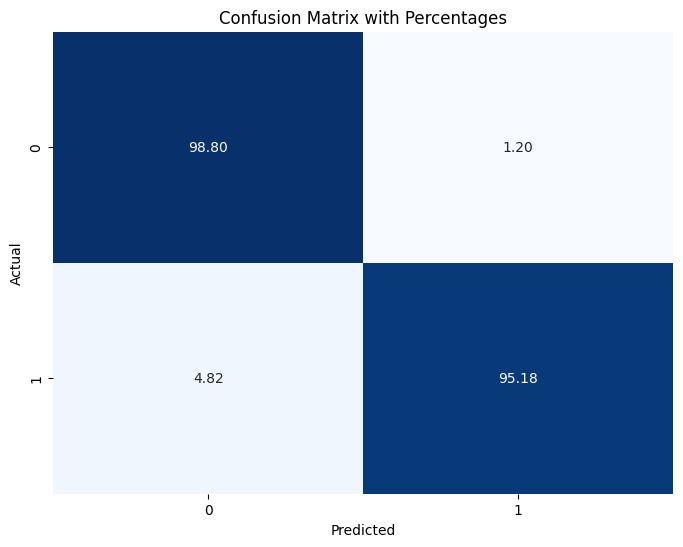

In [37]:
# Normalize the confusion matrix by dividing each value by the sum of the row
cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

# Plot the confusion matrix with percentages
plt.figure(figsize=(8, 6))
sns.heatmap(cm_percentage, annot=True, fmt='.2f', cmap='Blues', cbar=False)

# Set labels
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix with Percentages')

plt.show()

# **Part 2 : Fake news detection using Federated Learning :**

In [32]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split

def create_clients_and_server_data(DATA, n_b):
    work_dir = "FL_experiment"
    if not os.path.exists(work_dir):
        os.makedirs(work_dir)

    X = DATA.drop(['Label'], axis=1)
    y = DATA['Label']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    X_train = pd.DataFrame(X_train, columns=X.columns)
    X_test = pd.DataFrame(X_test, columns=X.columns)
    y_train = pd.DataFrame(y_train, columns=['Label'])
    y_test = pd.DataFrame(y_test, columns=['Label'])

    df_train = pd.concat([X_train, y_train], axis=1)
    df_test = pd.concat([X_test, y_test], axis=1)

    df_train_true = df_train[df_train['Label'] == 0]
    df_train_fake = df_train[df_train['Label'] == 1]
    m1 = len(df_train_true) // n_b
    m2 = len(df_train_fake)// n_b

    server_dir = os.path.join(work_dir, "Server")
    if not os.path.exists(server_dir):
        os.makedirs(server_dir)
    server_path = os.path.join(server_dir, "Server.csv")
    df_test.to_csv(server_path, sep=',', index=False)

    client_prefix = "Client_of_ID_"
    for i in range(1, n_b):
        sampled_df_0 = df_train_true.sample(n=m1, random_state=1)
        sampled_df_1 = df_train_fake.sample(n=m2, random_state=1)

        df_train_true = df_train_true.drop(sampled_df_0.index)
        df_train_fake = df_train_fake.drop(sampled_df_1.index)

        concatenated_df = pd.concat([sampled_df_0, sampled_df_1], axis=0).sample(frac=1, random_state=1)

        client_dir = os.path.join(work_dir, f"{client_prefix}{i}")
        if not os.path.exists(client_dir):
            os.makedirs(client_dir)
        client_file_path = os.path.join(client_dir, f"{client_prefix}{i}.csv")
        concatenated_df.to_csv(client_file_path, sep=',', index=False)

    remaining_df = pd.concat([df_train_true, df_train_fake], axis=0).sample(frac=1, random_state=1)
    client_dir = os.path.join(work_dir, f"{client_prefix}{n_b}")
    if not os.path.exists(client_dir):
        os.makedirs(client_dir)
    client_file_path = os.path.join(client_dir, f"{client_prefix}{n_b}.csv")
    remaining_df.to_csv(client_file_path, sep=',', index=False)

    print("Everything is fine. Thank you!")



In [33]:
create_clients_and_server_data(data,3)

Everything is fine. Thank you!


In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dropout, Dense, BatchNormalization

def create_the_model(max_words=10000, max_len=100):
    model = Sequential()
    model.add(Embedding(input_dim=max_words, output_dim=128, input_length=max_len))  # Increased output_dim
    model.add(LSTM(128, return_sequences=True))  # Increased units
    model.add(Dropout(0.5))
    model.add(LSTM(64)) # Added another LSTM layer
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    return model




In [ ]:
import tensorflow as tf
from tensorflow.keras import layers as L


def create_cnn_lstm_model(vocab_size, embedding_dim, dropout_rate, filters=32, kernel_size=3, lstm_units=32):
    """
    Creates a CNN-LSTM model for sequence classification.

    Args:
        vocab_size: Size of the vocabulary.
        embedding_dim: Dimensionality of the embedding space.
        dropout_rate: Dropout rate to prevent overfitting.
        filters: Number of filters in the convolutional layer.
        kernel_size: Size of the convolutional kernel.
        lstm_units: Number of units in the LSTM layer.
        num_classes: Number of classes for classification (2 for binary).

    Returns:
        A compiled Keras model.
    """

    model = tf.keras.Sequential([
        L.Embedding(vocab_size, embedding_dim, input_length=None),  # Input length can vary
        L.Conv1D(filters, kernel_size, activation="relu"),
        L.MaxPooling1D(pool_size=2),
        L.Dropout(dropout_rate),
        L.LSTM(lstm_units),
        L.Dropout(dropout_rate),
        L.Dense(256, activation="relu"),
        L.Dense(1, activation="sigmoid")
    ])

    model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

    return model



In [ ]:
import flwr as fl
import json
class Client(fl.client.NumPyClient):

    def __init__(self, X_train, X_test, y_train, y_test, model, cid):
        self.X_train = X_train
        self.X_test = X_test
        self.y_train = y_train
        self.y_test = y_test
        self.model = model
        self.cid = cid

    def get_parameters(self, config):
        return self.model.get_weights()

    def fit(self, parameters, config):
        self.model.set_weights(parameters)
        #t.fit(X_train)
        #X_train = t.transform(X_train)
        #X_test = t.transform(X_test)
        self.model.fit(self.X_train, self.y_train, epochs=2, batch_size=64, verbose=2)
        return self.model.get_weights(), len(self.X_train), {}

    def evaluate(self, parameters, config):
        self.model.set_weights(parameters)
        loss, accuracy = self.model.evaluate(self.X_test, self.y_test, verbose=2)
        y_pred = self.model.predict(self.X_test, verbose=2)

        y_pred_labels = np.argmax(y_pred, axis=1)
        f1 = f1_score(self.y_test, y_pred_labels, average='weighted')
        recall = recall_score(self.y_test, y_pred_labels, average='weighted')
        conf_matrix = confusion_matrix(self.y_test, y_pred_labels)

        results = {
            "client": self.cid+1,
            "accuracy": float(accuracy),
            "recall": recall,
            "f1": f1,
            "loss": loss
        }
        work_dir="FL_experiment"
        client_path = os.path.join(work_dir, "Client_of_ID_" + str(int(self.cid)+1), "results_client.json")
        with open(client_path, "a") as f:
            json.dump(results, f)
            f.write("\n")
        print(results)
        return loss, len(self.X_test), {"accuracy": accuracy, "recall": recall}

In [ ]:
def client_fn(cid: str):
    client_path = os.path.join("FL_experiment", f"Client_of_ID_{int(cid) + 1}", f"Client_of_ID_{int(cid) + 1}.csv")
    max_words = 10000  # Max number of words to consider in the tokenizer
    max_len = 100     # Max length of each sequence
    data = pd.read_csv(client_path)
    # Ensure all entries in 'article' column are strings
    data['article'] = data['article'].astype(str)
    tokenizer = Tokenizer(num_words=max_words)
    tokenizer.fit_on_texts(data['article'])
    sequences = tokenizer.texts_to_sequences(data['article'])
    word_index = tokenizer.word_index

    # Padding sequences
    data_padded = pad_sequences(sequences, maxlen=max_len)

    # Preparing labels
    labels = data['Label'].values
    X_train, X_test, y_train, y_test = train_test_split(data_padded, labels, test_size=0.2, random_state=42, stratify=labels)
    ####### model #########
    model = create_the_model()
    #######################
    return Client(X_train, X_test, y_train, y_test, model, int(cid))

In [ ]:
import os
import pandas as pd
import flwr as fl
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import pickle
def get_evaluate_fn(model):

    server_path = os.path.join("FL_experiment", "Server", "Server.csv")
    max_words = 10000  # Max number of words to consider in the tokenizer
    max_len = 100  # Max length of each sequence
    data = pd.read_csv(server_path)

    # Ensure all entries in 'article' column are strings
    data['article'] = data['article'].astype(str)

    tokenizer = Tokenizer(num_words=max_words)
    tokenizer.fit_on_texts(data['article'])
    sequences = tokenizer.texts_to_sequences(data['article'])
    word_index = tokenizer.word_index

    # Padding sequences
    data_padded = pad_sequences(sequences, maxlen=max_len)

    # Preparing labels
    labels = data['Label'].values

    def evaluate(
        server_round: int,
        parameters: fl.common.NDArrays,
        config: Dict[str, fl.common.Scalar]
    ):
        model.set_weights(parameters)  # Update model with the latest parameters
        loss, accuracy = model.evaluate(data_padded, labels)

        y_pred = self.model.predict(self.X_test, verbose=2)

        y_pred_labels = np.argmax(y_pred, axis=1)
        f1 = f1_score(self.y_test, y_pred_labels, average='weighted')
        recall = recall_score(self.y_test, y_pred_labels, average='weighted')

        res = {
            "accuracy": accuracy,
            "loss": loss,
        }
        with open(os.path.join("FL_experiment", "Server", "flwr_hist_server.obj"), 'wb') as h:
            pickle.dump(res, h)

        print("########## Server_Evaluation #############")
        print(res)
        print("###############################################")
        return loss, {
            "accuracy in the server side": accuracy,
            "loss in the server side": loss,
        }

    return evaluate


In [ ]:
import pickle

In [ ]:
model=create_the_model()
strategy=fl.server.strategy.FedAvg(
    min_available_clients=3,
    evaluate_fn=get_evaluate_fn(model),
)

# Start simulation
hist = fl.simulation.start_simulation(
    client_fn=client_fn,
    num_clients=3,
    config=fl.server.ServerConfig(num_rounds=10),
    strategy=strategy,
    client_resources=None,
)

INFO :      Starting Flower simulation, config: num_rounds=10, no round_timeout
2024-06-19 00:00:25,256	INFO worker.py:1752 -- Started a local Ray instance.
INFO :      Flower VCE: Ray initialized with resources: {'memory': 8005597595.0, 'node:__internal_head__': 1.0, 'accelerator_type:T4': 1.0, 'CPU': 2.0, 'object_store_memory': 4002798796.0, 'GPU': 1.0, 'node:172.28.0.12': 1.0}
INFO :      Optimize your simulation with Flower VCE: https://flower.ai/docs/framework/how-to-run-simulations.html
INFO :      No `client_resources` specified. Using minimal resources for clients.
INFO :      Flower VCE: Resources for each Virtual Client: {'num_cpus': 1, 'num_gpus': 0.0}
INFO :      Flower VCE: Creating VirtualClientEngineActorPool with 2 actors
INFO :      [INIT]
INFO :      Requesting initial parameters from one random client
(pid=5246) 2024-06-19 00:00:30.841631: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory 

242/242 [==============================] - 4s 8ms/step - loss: 0.6927 - accuracy: 0.5594


INFO :      initial parameters (loss, other metrics): 0.6926872134208679, {'accuracy in the server side': 0.5593790411949158, 'loss in the server side': 0.6926872134208679}
INFO :      
INFO :      [ROUND 1]
INFO :      configure_fit: strategy sampled 3 clients (out of 3)


########## Server_Evaluation #############
{'accuracy': 0.5593790411949158, 'loss': 0.6926872134208679}
###############################################


(ClientAppActor pid=5248) WARNING :   Deprecation Warning: The `client_fn` function must return an instance of `Client`, but an instance of `NumpyClient` was returned. Please use `NumPyClient.to_client()` method to convert it to `Client`.
(ClientAppActor pid=5246) 2024-06-19 00:00:51.947148: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:274] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
(ClientAppActor pid=5246) WARNING :   Deprecation Warning: The `client_fn` function must return an instance of `Client`, but an instance of `NumpyClient` was returned. Please use `NumPyClient.to_client()` method to convert it to `Client`.


(ClientAppActor pid=5246) 258/258 - 116s - loss: 0.2513 - accuracy: 0.9009 - 116s/epoch - 450ms/step


(ClientAppActor pid=5246) WARNING :   Deprecation Warning: The `client_fn` function must return an instance of `Client`, but an instance of `NumpyClient` was returned. Please use `NumPyClient.to_client()` method to convert it to `Client`.
INFO :      aggregate_fit: received 3 results and 0 failures


(ClientAppActor pid=5246) 258/258 - 61s - loss: 0.2235 - accuracy: 0.9112 - 61s/epoch - 237ms/step [repeated 2x across cluster] (Ray deduplicates logs by default. Set RAY_DEDUP_LOGS=0 to disable log deduplication, or see https://docs.ray.io/en/master/ray-observability/ray-logging.html#log-deduplication for more options.)
242/242 [==============================] - 2s 7ms/step - loss: 0.5701 - accuracy: 0.7109


INFO :      fit progress: (1, 0.5700737237930298, {'accuracy in the server side': 0.7108667492866516, 'loss in the server side': 0.5700737237930298}, 190.32295107000004)
INFO :      configure_evaluate: strategy sampled 3 clients (out of 3)


########## Server_Evaluation #############
{'accuracy': 0.7108667492866516, 'loss': 0.5700737237930298}
###############################################


(ClientAppActor pid=5246) WARNING :   Deprecation Warning: The `client_fn` function must return an instance of `Client`, but an instance of `NumpyClient` was returned. Please use `NumPyClient.to_client()` method to convert it to `Client`.


(ClientAppActor pid=5246) 65/65 - 14s - loss: 0.3858 - accuracy: 0.8991 - 14s/epoch - 222ms/step
(ClientAppActor pid=5248) 65/65 - 14s - loss: 0.3880 - accuracy: 0.8826 - 14s/epoch - 220ms/step
(ClientAppActor pid=5246) 65/65 - 8s - 8s/epoch - 129ms/step
(ClientAppActor pid=5246) {'client': 1, 'accuracy': 0.8990781307220459, 'recall': 0.5482775351770985, 'f1': 0.38831313992486455, 'loss': 0.38575825095176697}


(ClientAppActor pid=5246) WARNING :   Deprecation Warning: The `client_fn` function must return an instance of `Client`, but an instance of `NumpyClient` was returned. Please use `NumPyClient.to_client()` method to convert it to `Client`. [repeated 2x across cluster]


(ClientAppActor pid=5246) 65/65 - 4s - loss: 0.3798 - accuracy: 0.9000 - 4s/epoch - 67ms/step
(ClientAppActor pid=5248) 65/65 - 8s - 8s/epoch - 130ms/step
(ClientAppActor pid=5248) {'client': 3, 'accuracy': 0.8826382160186768, 'recall': 0.5484966052376333, 'f1': 0.3885685314899864, 'loss': 0.3879604637622833}


INFO :      aggregate_evaluate: received 3 results and 0 failures
INFO :      
INFO :      [ROUND 2]
INFO :      configure_fit: strategy sampled 3 clients (out of 3)


(ClientAppActor pid=5246) 65/65 - 4s - 4s/epoch - 58ms/step
(ClientAppActor pid=5246) {'client': 2, 'accuracy': 0.9000484943389893, 'recall': 0.5482775351770985, 'f1': 0.38831313992486455, 'loss': 0.379810631275177}


(ClientAppActor pid=5246) WARNING :   Deprecation Warning: The `client_fn` function must return an instance of `Client`, but an instance of `NumpyClient` was returned. Please use `NumPyClient.to_client()` method to convert it to `Client`.
(ClientAppActor pid=5248) WARNING :   Deprecation Warning: The `client_fn` function must return an instance of `Client`, but an instance of `NumpyClient` was returned. Please use `NumPyClient.to_client()` method to convert it to `Client`.


(ClientAppActor pid=5248) 258/258 - 118s - loss: 0.1072 - accuracy: 0.9663 - 118s/epoch - 457ms/step
(ClientAppActor pid=5246) 258/258 - 120s - loss: 0.1118 - accuracy: 0.9630 - 120s/epoch - 464ms/step


(ClientAppActor pid=5248) WARNING :   Deprecation Warning: The `client_fn` function must return an instance of `Client`, but an instance of `NumpyClient` was returned. Please use `NumPyClient.to_client()` method to convert it to `Client`.
INFO :      aggregate_fit: received 3 results and 0 failures


(ClientAppActor pid=5248) 258/258 - 60s - loss: 0.1178 - accuracy: 0.9611 - 60s/epoch - 234ms/step
242/242 [==============================] - 1s 6ms/step - loss: 0.5607 - accuracy: 0.7373


INFO :      fit progress: (2, 0.5606808662414551, {'accuracy in the server side': 0.7372574210166931, 'loss in the server side': 0.5606808662414551}, 426.6388520539999)
INFO :      configure_evaluate: strategy sampled 3 clients (out of 3)


########## Server_Evaluation #############
{'accuracy': 0.7372574210166931, 'loss': 0.5606808662414551}
###############################################


(ClientAppActor pid=5248) WARNING :   Deprecation Warning: The `client_fn` function must return an instance of `Client`, but an instance of `NumpyClient` was returned. Please use `NumPyClient.to_client()` method to convert it to `Client`.


(ClientAppActor pid=5248) 65/65 - 11s - loss: 0.1868 - accuracy: 0.9224 - 11s/epoch - 162ms/step
(ClientAppActor pid=5248) 65/65 - 8s - 8s/epoch - 120ms/step
(ClientAppActor pid=5246) 65/65 - 11s - loss: 0.2459 - accuracy: 0.8991 - 11s/epoch - 166ms/step
(ClientAppActor pid=5248) {'client': 1, 'accuracy': 0.9223678112030029, 'recall': 0.5482775351770985, 'f1': 0.38831313992486455, 'loss': 0.18684673309326172}


(ClientAppActor pid=5248) WARNING :   Deprecation Warning: The `client_fn` function must return an instance of `Client`, but an instance of `NumpyClient` was returned. Please use `NumPyClient.to_client()` method to convert it to `Client`. [repeated 2x across cluster]


(ClientAppActor pid=5248) 65/65 - 4s - loss: 0.2154 - accuracy: 0.9093 - 4s/epoch - 60ms/step
(ClientAppActor pid=5246) 65/65 - 8s - 8s/epoch - 118ms/step
(ClientAppActor pid=5246) {'client': 3, 'accuracy': 0.8991270661354065, 'recall': 0.5484966052376333, 'f1': 0.3885685314899864, 'loss': 0.245879128575325}


INFO :      aggregate_evaluate: received 3 results and 0 failures
INFO :      
INFO :      [ROUND 3]
INFO :      configure_fit: strategy sampled 3 clients (out of 3)


(ClientAppActor pid=5248) 65/65 - 3s - 3s/epoch - 52ms/step
(ClientAppActor pid=5248) {'client': 2, 'accuracy': 0.9092673659324646, 'recall': 0.5482775351770985, 'f1': 0.38831313992486455, 'loss': 0.2154412865638733}


(ClientAppActor pid=5246) WARNING :   Deprecation Warning: The `client_fn` function must return an instance of `Client`, but an instance of `NumpyClient` was returned. Please use `NumPyClient.to_client()` method to convert it to `Client`.
(ClientAppActor pid=5248) WARNING :   Deprecation Warning: The `client_fn` function must return an instance of `Client`, but an instance of `NumpyClient` was returned. Please use `NumPyClient.to_client()` method to convert it to `Client`.


(ClientAppActor pid=5248) 258/258 - 118s - loss: 0.0757 - accuracy: 0.9738 - 118s/epoch - 456ms/step
(ClientAppActor pid=5246) 258/258 - 119s - loss: 0.0779 - accuracy: 0.9753 - 119s/epoch - 460ms/step


(ClientAppActor pid=5248) WARNING :   Deprecation Warning: The `client_fn` function must return an instance of `Client`, but an instance of `NumpyClient` was returned. Please use `NumPyClient.to_client()` method to convert it to `Client`.
INFO :      aggregate_fit: received 3 results and 0 failures


(ClientAppActor pid=5248) 258/258 - 60s - loss: 0.0712 - accuracy: 0.9762 - 60s/epoch - 234ms/step
242/242 [==============================] - 1s 6ms/step - loss: 0.6181 - accuracy: 0.6957


INFO :      fit progress: (3, 0.6180691719055176, {'accuracy in the server side': 0.6957309246063232, 'loss in the server side': 0.6180691719055176}, 656.336385068)
INFO :      configure_evaluate: strategy sampled 3 clients (out of 3)


########## Server_Evaluation #############
{'accuracy': 0.6957309246063232, 'loss': 0.6180691719055176}
###############################################


(ClientAppActor pid=5246) WARNING :   Deprecation Warning: The `client_fn` function must return an instance of `Client`, but an instance of `NumpyClient` was returned. Please use `NumPyClient.to_client()` method to convert it to `Client`.


(ClientAppActor pid=5246) 65/65 - 9s - loss: 0.1794 - accuracy: 0.9311 - 9s/epoch - 131ms/step
(ClientAppActor pid=5246) 65/65 - 10s - 10s/epoch - 150ms/step
(ClientAppActor pid=5248) 65/65 - 8s - loss: 0.2366 - accuracy: 0.9045 - 8s/epoch - 128ms/step
(ClientAppActor pid=5246) {'client': 1, 'accuracy': 0.931101381778717, 'recall': 0.5482775351770985, 'f1': 0.38831313992486455, 'loss': 0.1794092208147049}


(ClientAppActor pid=5246) WARNING :   Deprecation Warning: The `client_fn` function must return an instance of `Client`, but an instance of `NumpyClient` was returned. Please use `NumPyClient.to_client()` method to convert it to `Client`. [repeated 2x across cluster]


(ClientAppActor pid=5246) 65/65 - 4s - loss: 0.2133 - accuracy: 0.9088 - 4s/epoch - 66ms/step
(ClientAppActor pid=5248) 65/65 - 10s - 10s/epoch - 147ms/step
(ClientAppActor pid=5248) {'client': 3, 'accuracy': 0.904461681842804, 'recall': 0.5484966052376333, 'f1': 0.3885685314899864, 'loss': 0.23657511174678802}


INFO :      aggregate_evaluate: received 3 results and 0 failures
INFO :      
INFO :      [ROUND 4]
INFO :      configure_fit: strategy sampled 3 clients (out of 3)


(ClientAppActor pid=5246) 65/65 - 5s - 5s/epoch - 80ms/step
(ClientAppActor pid=5246) {'client': 2, 'accuracy': 0.9087821245193481, 'recall': 0.5482775351770985, 'f1': 0.38831313992486455, 'loss': 0.21328678727149963}


(ClientAppActor pid=5246) WARNING :   Deprecation Warning: The `client_fn` function must return an instance of `Client`, but an instance of `NumpyClient` was returned. Please use `NumPyClient.to_client()` method to convert it to `Client`.
(ClientAppActor pid=5248) WARNING :   Deprecation Warning: The `client_fn` function must return an instance of `Client`, but an instance of `NumpyClient` was returned. Please use `NumPyClient.to_client()` method to convert it to `Client`.


(ClientAppActor pid=5246) 258/258 - 117s - loss: 0.0496 - accuracy: 0.9840 - 117s/epoch - 453ms/step


(ClientAppActor pid=5246) WARNING :   Deprecation Warning: The `client_fn` function must return an instance of `Client`, but an instance of `NumpyClient` was returned. Please use `NumPyClient.to_client()` method to convert it to `Client`.
INFO :      aggregate_fit: received 3 results and 0 failures


(ClientAppActor pid=5246) 258/258 - 60s - loss: 0.0596 - accuracy: 0.9806 - 60s/epoch - 232ms/step [repeated 2x across cluster]
242/242 [==============================] - 2s 7ms/step - loss: 0.7691 - accuracy: 0.6812


INFO :      fit progress: (4, 0.7691224813461304, {'accuracy in the server side': 0.6812419295310974, 'loss in the server side': 0.7691224813461304}, 886.7620584669999)
INFO :      configure_evaluate: strategy sampled 3 clients (out of 3)


########## Server_Evaluation #############
{'accuracy': 0.6812419295310974, 'loss': 0.7691224813461304}
###############################################


(ClientAppActor pid=5246) WARNING :   Deprecation Warning: The `client_fn` function must return an instance of `Client`, but an instance of `NumpyClient` was returned. Please use `NumPyClient.to_client()` method to convert it to `Client`.


(ClientAppActor pid=5246) 65/65 - 11s - loss: 0.2107 - accuracy: 0.9180 - 11s/epoch - 168ms/step
(ClientAppActor pid=5248) 65/65 - 11s - loss: 0.2542 - accuracy: 0.8903 - 11s/epoch - 168ms/step
(ClientAppActor pid=5248) 65/65 - 8s - 8s/epoch - 131ms/step
(ClientAppActor pid=5248) {'client': 2, 'accuracy': 0.890344500541687, 'recall': 0.5482775351770985, 'f1': 0.38831313992486455, 'loss': 0.25420263409614563}


(ClientAppActor pid=5246) WARNING :   Deprecation Warning: The `client_fn` function must return an instance of `Client`, but an instance of `NumpyClient` was returned. Please use `NumPyClient.to_client()` method to convert it to `Client`. [repeated 2x across cluster]


(ClientAppActor pid=5246) 65/65 - 6s - loss: 0.2280 - accuracy: 0.9069 - 6s/epoch - 94ms/step
(ClientAppActor pid=5246) 65/65 - 9s - 9s/epoch - 135ms/step
(ClientAppActor pid=5246) {'client': 1, 'accuracy': 0.9180009961128235, 'recall': 0.5482775351770985, 'f1': 0.38831313992486455, 'loss': 0.21070408821105957}


INFO :      aggregate_evaluate: received 3 results and 0 failures
INFO :      
INFO :      [ROUND 5]
INFO :      configure_fit: strategy sampled 3 clients (out of 3)


(ClientAppActor pid=5246) 65/65 - 4s - 4s/epoch - 62ms/step
(ClientAppActor pid=5246) {'client': 3, 'accuracy': 0.9068865180015564, 'recall': 0.5484966052376333, 'f1': 0.3885685314899864, 'loss': 0.22799646854400635}


(ClientAppActor pid=5246) WARNING :   Deprecation Warning: The `client_fn` function must return an instance of `Client`, but an instance of `NumpyClient` was returned. Please use `NumPyClient.to_client()` method to convert it to `Client`.
(ClientAppActor pid=5248) WARNING :   Deprecation Warning: The `client_fn` function must return an instance of `Client`, but an instance of `NumpyClient` was returned. Please use `NumPyClient.to_client()` method to convert it to `Client`.


(ClientAppActor pid=5248) 258/258 - 134s - loss: 0.0505 - accuracy: 0.9858 - 134s/epoch - 520ms/step
(ClientAppActor pid=5246) 258/258 - 137s - loss: 0.0480 - accuracy: 0.9854 - 137s/epoch - 530ms/step
